# Play Store App review Analysis

By - Manvi Godbole

# The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
# Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
# Explore and analyze the data to discover key factors responsible for app engagement and success. 

# **Problem Statements** 
1. What are the top categories on Play Store?
2. Are majority of the apps Paid or Free?
3. How importance is the rating of the application?
4. Which categories from the audience should the app be based on?
5. Which category has the most no. of installations?
6. How does the count of apps varies by Genres?
7. How does the last update has an effect on the rating?
8. How are ratings affected when the app is a paid one?
9. How are reviews and ratings co-related?
10. Lets us discuss the sentiment subjectivity.
11. Is subjectivity and polarity proportional to each other?
12. What is the percentage of review sentiments?
13. How is sentiment polarity varying for paid and free apps?
14. How Content Rating affect over the App?
15. Does Last Update date has an effects on rating?
16. Distribution of App update over the Year.
17.Distribution of Paid and Free app updated over the Month.
 

# importing Libraries  data && DataFrames

In [1]:
# Let us begin with importing the libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
# plotly
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
%matplotlib inline


In [2]:
play_store=pd.read_csv('/content/Play Store Data (1).csv')
User_reviews=pd.read_csv('/content/User Reviews (1).csv')

In [3]:
User_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
play_store.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Lets Explore the Two **DataFrames:**

In [5]:
print(f"The shape of PlayStore_df is {play_store.shape}")
print(f"The shape of UserReview_df is {User_reviews.shape}")

The shape of PlayStore_df is (10841, 13)
The shape of UserReview_df is (64295, 5)


Total no of app titles contain astrology.

In [6]:
print(play_store.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [7]:
print(User_reviews.columns)

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [8]:
play_store.columns= play_store.columns.str.replace(" ","_")
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

### **1. Lets Explore play_store DataFrames**

In [9]:
rows = play_store.shape[0]
column = play_store.shape[1]
print(f'There are {rows} Rows and {column} Columns in the PlayStore DataFrame')

There are 10841 Rows and 13 Columns in the PlayStore DataFrame


Get information about our Data set like Total number rows and total no of columns, datatypes of each column and memory requirements.

In [10]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
from numpy.lib.function_base import place
# Lets print the first and last 10 rows of information of the dataframe.

concat_UR  = pd.concat([play_store.head(10),play_store.tail(10)])
concat_UR

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Get overall Statistics about the Dataframe

In [12]:
play_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **Let us first define what information the columns contain based on our inspection.**

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:

1.App - It tells us about the name of the application.

2.**Category** - It tells us about the category to which an application belongs.

3.**Rating** - It tells us about the ratings given by the users for a specific application.

4.**Reviews** - It tells us about the total number of users who have given a review for the application.

5.**Size** - It tells us about the size being occupied the application on the mobile phone.

6.**Installs** - It tells us about the total number of installs/downloads for an application.

7.**Type** - It tells us whether the application is free or a paid one.

8.**Price** - It tells us about the price of the application.

9.**Content_Rating** - It tells us about the target audience for the application.

10.**Genres** - It tells us about the various other categories to which an application can belong.

11.**Last_Updated** - It tells us about the when the application was updated.

12.**Current_Ver** - It tells us about the current version of the application.

13.**Android_Ver** - It tells us about the android version which can support the application on its platform.

**Findings**

The number of null values are:

Rating has 1474 null values which contributes 13.60% of the data.         
Type has 1 null value which contributes 0.01% of the data.                              
Content_Rating has 1 null value which contributes 0.01% of the data.           
Current_Ver has 8 null values which contributes 0.07% of the data.             
Android_Ver has 3 null values which contributes 0.03% of the data.            

### **2. Lets Explore user_review DataFrame**

In [13]:
rows = User_reviews.shape[0]
column = User_reviews.shape[1]
print(f'There are {rows} Rows and {column} Columns in the user_review DataFrame')

There are 64295 Rows and 5 Columns in the user_review DataFrame


In [14]:
User_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [15]:
concat_UR  = pd.concat([User_reviews.head(10),User_reviews.tail(10)])
concat_UR

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [16]:
User_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [17]:
User_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


## **Data Preparation Cleaning of the data**
Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data, and the combining of data sets to enrich data. Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a recordset, table, or database and refers to identifying incomplete, incorrect, inaccurate, or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

We saw that the dataset contains many Null or missing values. The column Rating, Type , Content Rating , Current Ver , andAndroid Ver contains 1474, 1, 1, 8, and 3 missing values respectively.

The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

Removing the Nan value and Duplicate present in the data set

Will it not be better if we can define a function to get more useful information about the different attributes of the dataset, also there is one more valid point in defining a function which it will be reusable, and we are going to utilize our defined function several times in future.

## Handling the NaN values in the Play store data

In [18]:
# This user define function will give the type,count of null and non null values as well as null ratio
def playstoreinfo():
  temp=pd.DataFrame(index=play_store.columns)
  temp["datatype"]=play_store.dtypes
  temp["not null values"]=play_store.count()
  temp["null value"]=play_store.isnull().sum()
  temp["% of the null value"]=play_store.isnull().mean()
  temp["unique count"]=play_store.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content_Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


In [19]:
# creating new_UR DF
# We have dropped the rows having all null values as it makes no sense in keeping them
new_UR = User_reviews.dropna(subset=["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"],how="all")

In [20]:

new_UR.shape

(37432, 5)

In [21]:
new_UR.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [22]:
new_UR[new_UR.Translated_Review.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [23]:
new_UR = new_UR.dropna(subset= ["Translated_Review"],how = "all")
new_UR.shape

(37427, 5)

In [24]:
def New_URinfo():
    temp = pd.DataFrame(index=new_UR.columns)
    temp['data_type'] = new_UR.dtypes
    temp["count of non null values"] = new_UR.count()
    temp['NaN values'] = new_UR.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(new_UR)).round(4)*100 # or new_UR.isnull().mean()
    temp['unique_count'] = new_UR.nunique()
    return temp 
New_URinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,37427,0,0.0,865
Translated_Review,object,37427,0,0.0,27994
Sentiment,object,37427,0,0.0,3
Sentiment_Polarity,float64,37427,0,0.0,5410
Sentiment_Subjectivity,float64,37427,0,0.0,4474


  CONCLUSION: From the above output we can infer that we have removed all the NaN values from the user_review data frame.

## Missing Values in play_store DF

In [25]:
# If any columns have 90% ofthe data missing then we can drop that column.

print(len(play_store)*0.9) # 90% of data will be 9756
play_store.isnull().sum()

# From the below output we can infer that no columns has 9756 NaN values 
# so we need not to Drop any Columns in this DataFrame.

9756.9


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

### **Findings**

The number of null values are:

Rating has 1474 null values which contributes 13.60% of the data. Type has 1 null value which contributes 0.01% of the data. Content_Rating has 1 null value which contributes 0.01% of the data. Current_Ver has 8 null values which contributes 0.07% of the data. Android_Ver has 3 null values which contributes 0.03% of the data.

Lets first deal with the columns which contains lesser number of NaN values. By going through the NaN values, we must come up with a way to replace them with non NaN values or we need to come up with a reason for having NaN.

### **1). Android Ver: There are a total of 3 NaN values in this column.**

In [26]:
# The rows containing NaN values in the Android Ver column
play_store[play_store["Android_Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [27]:
# Finding the different values the 'Android Ver' column takes
play_store["Android_Ver"].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android_Ver, dtype: int64

Since the NaN values in the Android Ver column cannot be replaced by any particular value, and, since there are only 3 rows which contain NaN values in this column, which accounts to less than 0.03% of the total rows in the given dataset, it can be be dropped.


In [28]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.
play_store=play_store[play_store['Android_Ver'].notna()]
# Shape of the updated dataframe
play_store.shape

(10838, 13)

### 2). Current Ver: There are a total of 8 NaN values in this column.

In [29]:
# The rows containing NaN values in the Current Ver column
play_store[play_store["Current_Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [30]:
# Finding the different values the 'Current Ver' column takes
play_store['Current_Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current_Ver, Length: 2831, dtype: int64

Since there are only 8 rows which contain NaN values in the Current Ver column, and it accounts to just around 0.07% of the total rows in the given dataset, and there is no particular value with which we can replace it, these rows can be dropped.

In [31]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.
play_store=play_store[play_store["Current_Ver"].notna()]
# Shape of the updated dataframe
play_store.shape

(10830, 13)

### **3). Type: There is only one NaN value in this column.**





In [32]:
# The row containing NaN values in the Type column
play_store[play_store["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


### 4). Rating: This column contains 1470 NaN values.

In [33]:
# The rows containing NaN values in the Rating column
play_store[play_store['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Also, we know that the rating of any app in the play store will be in between 1 and 5. Lets check whether there are any ratings out of this range.

In [34]:
play_store[(play_store['Rating'] <1) | (play_store['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver




*  The Rating column contains 1470 NaN values which accounts to apprximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.

*  The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column.





In [35]:
 # Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(play_store[~play_store['Rating'].isnull()]['Rating'].mean(),4)

median_rating = play_store[~play_store['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]
[4.1918, 4.3]

[4.1918, 4.3]

Visualization of distribution of rating using displot and detecting the outliers through boxplot.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



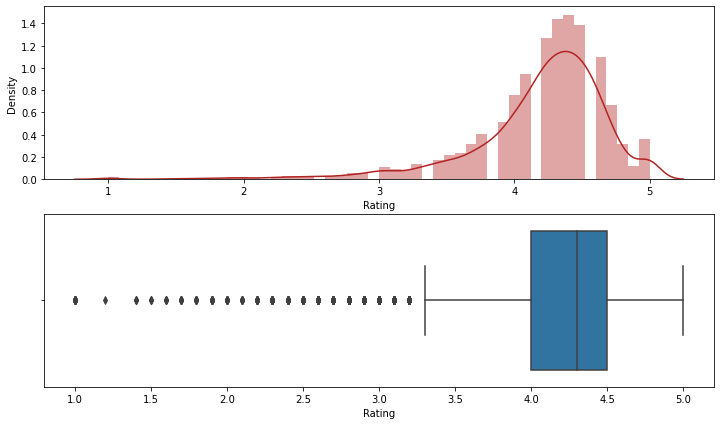

In [36]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(play_store['Rating'],color='firebrick',ax=ax[0])
sns.boxplot(x='Rating',data=play_store, ax=ax[1])

*  The mean of the average ratings (excluding the NaN values) comes to be 4.2.

*  The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.

* From the distplot visualizations, it is clear that the ratings are left skewed.

* We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

*  Hence we will impute the NaN values in the Rating column with its median.













### Lets Merge Two DataFrames based on common "App" Column.

In [37]:
# Lets Merge two DataFrame to check the common apps 
ps_copy = play_store.copy()
ur_copy = new_UR.copy()


In [38]:
merged_PS_UR = pd.merge(ps_copy, ur_copy, how='inner', left_on='App', right_on='App')

In [39]:
def Mergedinfo():
    temp = pd.DataFrame(index=merged_PS_UR.columns)
    temp['data_type'] = merged_PS_UR.dtypes
    temp["count of non null values"] = merged_PS_UR.count()
    temp['NaN values'] = merged_PS_UR.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(merged_PS_UR)).round(4)*100 # or merged_PS_UR.isnull().mean()
    temp['unique_count'] = merged_PS_UR.nunique()
    return temp 
Mergedinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,72605,0,0.00,816
Category,object,72605,0,0.00,33
Rating,float64,72566,39,0.05,22
Reviews,object,72605,0,0.00,1068
Size,object,72605,0,0.00,168
Installs,object,72605,0,0.00,12
Type,object,72605,0,0.00,2
Price,object,72605,0,0.00,9
Content_Rating,object,72605,0,0.00,5
Genres,object,72605,0,0.00,68


In [40]:
merged_PS_UR[merged_PS_UR.Rating.isnull()] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
47874,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Have used years great success. Easy & fast. Lo...,Positive,0.488889,0.563889
47875,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,I like shows blood pressure good level also hi...,Positive,0.286667,0.480000
47876,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Really helps track pressure allows write note ...,Positive,0.100000,0.300000
47877,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,The best Blood Pressure Android...... My Docto...,Positive,1.000000,0.650000
47878,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Very helpful many useful features. Particularl...,Positive,0.291667,0.283333
47879,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Doesn't work.,Neutral,0.000000,0.000000
47880,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Just 3 weeks far happy..,Positive,0.450000,1.000000
47881,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Great tracking blood pressure readings. Love e...,Positive,0.650000,0.675000
47882,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Nice UI. Easy enter data.,Positive,0.516667,0.916667
47883,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Easy helpful,Positive,0.433333,0.833333


In [41]:
play_store[play_store["Rating"].isnull() & play_store["Category"].str.contains("MEDICAL") & play_store["App"].str.contains("Blood Pressure")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2356,Free Blood Pressure,MEDICAL,NaN,7,5.7M,"5,000+",Free,0,Everyone,Medical,"October 13, 2016",3.0.0,4.0.3 and up
2502,Free Blood Pressure,MEDICAL,NaN,7,5.7M,"5,000+",Free,0,Everyone,Medical,"October 13, 2016",3.0.0,4.0.3 and up
2513,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up
6598,Free Blood Pressure,MEDICAL,NaN,7,5.7M,"5,000+",Free,0,Everyone,Medical,"October 13, 2016",3.0.0,4.0.3 and up


In [42]:

mode_value = play_store.Rating.mode()[0]
mode_value

4.4

In [43]:
# This is just for confirmation after filling one NaN Rating. 

print(f'The shape of Play_Store DF having NaN Ratings are : {play_store[play_store["Rating"].isnull()].shape}')
play_store[play_store["Rating"].isnull() & play_store["Category"].str.contains("MEDICAL") & play_store["App"].str.contains("Blood Pressure")]

The shape of Play_Store DF having NaN Ratings are : (1470, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2356,Free Blood Pressure,MEDICAL,NaN,7,5.7M,"5,000+",Free,0,Everyone,Medical,"October 13, 2016",3.0.0,4.0.3 and up
2502,Free Blood Pressure,MEDICAL,NaN,7,5.7M,"5,000+",Free,0,Everyone,Medical,"October 13, 2016",3.0.0,4.0.3 and up
2513,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up
6598,Free Blood Pressure,MEDICAL,NaN,7,5.7M,"5,000+",Free,0,Everyone,Medical,"October 13, 2016",3.0.0,4.0.3 and up


In [44]:
# Unique Categories in the filtered DF where the ratings are null.

play_store[play_store["Rating"].isnull()]["Category"].unique()

array(['ART_AND_DESIGN', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS',
       'COMICS', 'DATING', 'EDUCATION', 'EVENTS', 'FOOD_AND_DRINK',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'FAMILY', 'MEDICAL',
       'TOOLS', 'PARENTING', 'VIDEO_PLAYERS', 'PERSONALIZATION', 'GAME',
       'PHOTOGRAPHY', 'SOCIAL', 'SPORTS', 'COMMUNICATION', 'PRODUCTIVITY',
       'AUTO_AND_VEHICLES', 'FINANCE', 'LIFESTYLE', 'TRAVEL_AND_LOCAL',
       'SHOPPING', 'HEALTH_AND_FITNESS', 'WEATHER', 'NEWS_AND_MAGAZINES',
       'MAPS_AND_NAVIGATION'], dtype=object)

We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.

In [45]:
new_PS = play_store.dropna(subset = ["Rating"],how= "all")
new_PS

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [46]:

play_store.groupby(["Category"])["App"].nunique()

Category
ART_AND_DESIGN           63
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     221
BUSINESS                420
COMICS                   56
COMMUNICATION           316
DATING                  171
EDUCATION               119
ENTERTAINMENT           102
EVENTS                   64
FAMILY                 1906
FINANCE                 345
FOOD_AND_DRINK          112
GAME                    960
HEALTH_AND_FITNESS      288
HOUSE_AND_HOME           74
LIBRARIES_AND_DEMO       83
LIFESTYLE               369
MAPS_AND_NAVIGATION     131
MEDICAL                 396
NEWS_AND_MAGAZINES      254
PARENTING                60
PERSONALIZATION         374
PHOTOGRAPHY             281
PRODUCTIVITY            374
SHOPPING                202
SOCIAL                  239
SPORTS                  327
TOOLS                   827
TRAVEL_AND_LOCAL        219
VIDEO_PLAYERS           164
WEATHER                  79
Name: App, dtype: int64

From the above we can see that number of total Apps found in each category.

Note: Ignore the 1.9 category name as of now.

# Handling duplicates values and Manipulating dataset:
### 1).Handling the duplicates in theApp column

In [47]:
# Handling the error values in the Play store data
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [48]:
play_store['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [49]:
play_store[play_store.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [50]:
# dropping duplicates from the 'App' column.
play_store.drop_duplicates(subset = 'App', inplace = True)
play_store.shape

(9649, 13)

In [51]:

# Checking whether the duplicates in the 'App' column are taken care of or not
play_store[play_store['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [52]:
modeValueRating = play_store['Rating'].mode()

In [53]:
play_store['Rating'].fillna(value=modeValueRating[0], inplace = True)

## 2). Changing the datatype of the Last Updated column from string to datetime.

In [54]:
# Pandas to_datetime() function applied to the values in the last updated column helps to convert string Date time into Python Date time object.
play_store["Last_Updated"] = pd.to_datetime(play_store['Last_Updated'])
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up



## 3). Changing the datatype of thePrice column from string to float.

In [55]:
play_store['Price'].value_counts()

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

To convert this column from string to float, we must first drop the $ symbol from the all the values. Then we can assign float datatype to those values.

Applying the drop_dollar function to convert the values in thePrice column from string datatype to float datatype.

In [56]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.
def convert_dollar(val):
  '''
  This funtion drops the $ symbol if present and returns the value with float datatype.
  '''
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [57]:
# The drop_dollar funtion applied to the price column
play_store['Price']=play_store['Price']
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [58]:
play_store[play_store['Price']!=0].tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


## 4). Converting the values in theInstallscolumn from string datatype to integer datatype.

In [59]:
# Checking the contents of the 'Installs' column
play_store['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

To convert all the values in the Installs column from string datatype to integer datatype, we must first drop the '+' symbol from all the entries if present and then we can change its datatype.

Applying the convert_plus function to convert the values in the Installs column from string datatype to float datatype.

In [60]:
# Creating a function convert_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.

def convert_plus(val):
  '''
  This function drops the + symbol if present and returns the value with int datatype.
  '''
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [61]:
# The drop_plus funtion applied to the main dataframe

play_store['Installs'] = play_store['Installs']
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


he resultant values in the **Installs** column are of the integer datatype, and it represents the least number of times a particular app has been installed.

*   **Installs**= 0 indicates that that particular app has not been installed by anyone yet.
*   **Installs** = 1 indicates that the particular app has been installed by atleast one user


*  **Installs** = 1000000 indicates that the particular app has been installed by atleast one million users. So on and so forth.
*   We have successfully converted the datatype of values in the Installs column from string to int.









In [62]:
play_store.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

## 5). Converting the values in theSizecolumn to a same unit of measure(MB).

In [63]:
play_store['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

We can see that the values in the Size column contains data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.

We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.

In [64]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

Applying the kb_to_mb function to convert the values in the Size column to a single unit of measure (MB) and the datatype from string to float

In [65]:
# The kb_to_mb funtion applied to the size column

play_store['Size'] = play_store['Size'].apply(lambda x: convert_kb_to_mb(x))
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [66]:
play_store['Size'] = play_store['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store['Size'] = play_store['Size'].apply(lambda x: float(x))

A vast majority of the entries in the Size column contain the entry Varies with device. Since this entry cannot be used for analysis lets see if it can be imputed with the mean or median value of the entries in this column.

In [67]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = play_store[play_store['Size'] != 'Varies with device']['Size'].max()

min_size = play_store[play_store['Size'] != 'Varies with device']['Size'].min()

mean_size = round(play_store[play_store['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = play_store[play_store['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 20.4136, 12.0]

Visualization of distribution of `Size` using displot and detecting the outliers through boxplot.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



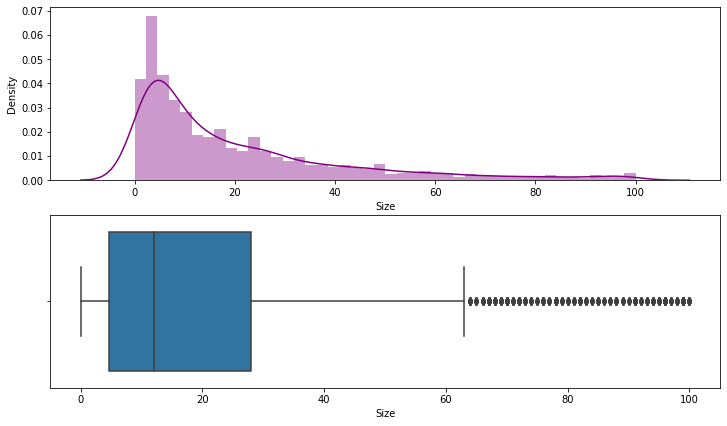

In [68]:
# Distplot
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(play_store[play_store['Size'] != 'Varies with device']['Size'], color='purple', ax=ax[0])
sns.boxplot(x='Size',data=play_store, ax=ax[1])

In [69]:
play_store.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [70]:
play_store.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [71]:
play_store.Last_Updated.unique()

array(['2018-01-07T00:00:00.000000000', '2018-01-15T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000', ...,
       '2014-01-20T00:00:00.000000000', '2014-02-16T00:00:00.000000000',
       '2014-03-23T00:00:00.000000000'], dtype='datetime64[ns]')

In [72]:
play_store.Current_Ver.unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [73]:
play_store.Android_Ver.unique() # Varies with device is not a garbage value.

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

## 6). Converting the datatype of values in theReviewscolumn from string to int.

In [74]:
# Converting the datatype of the values in the reviews column from string to int
play_store['Reviews'] = play_store['Reviews'].astype(int)
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


## Data Exploration visualization using pair plot

**Pair plot** is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Plot a pairwise plot between all the quantitative variables to look for any evident patterns or relationships between the features

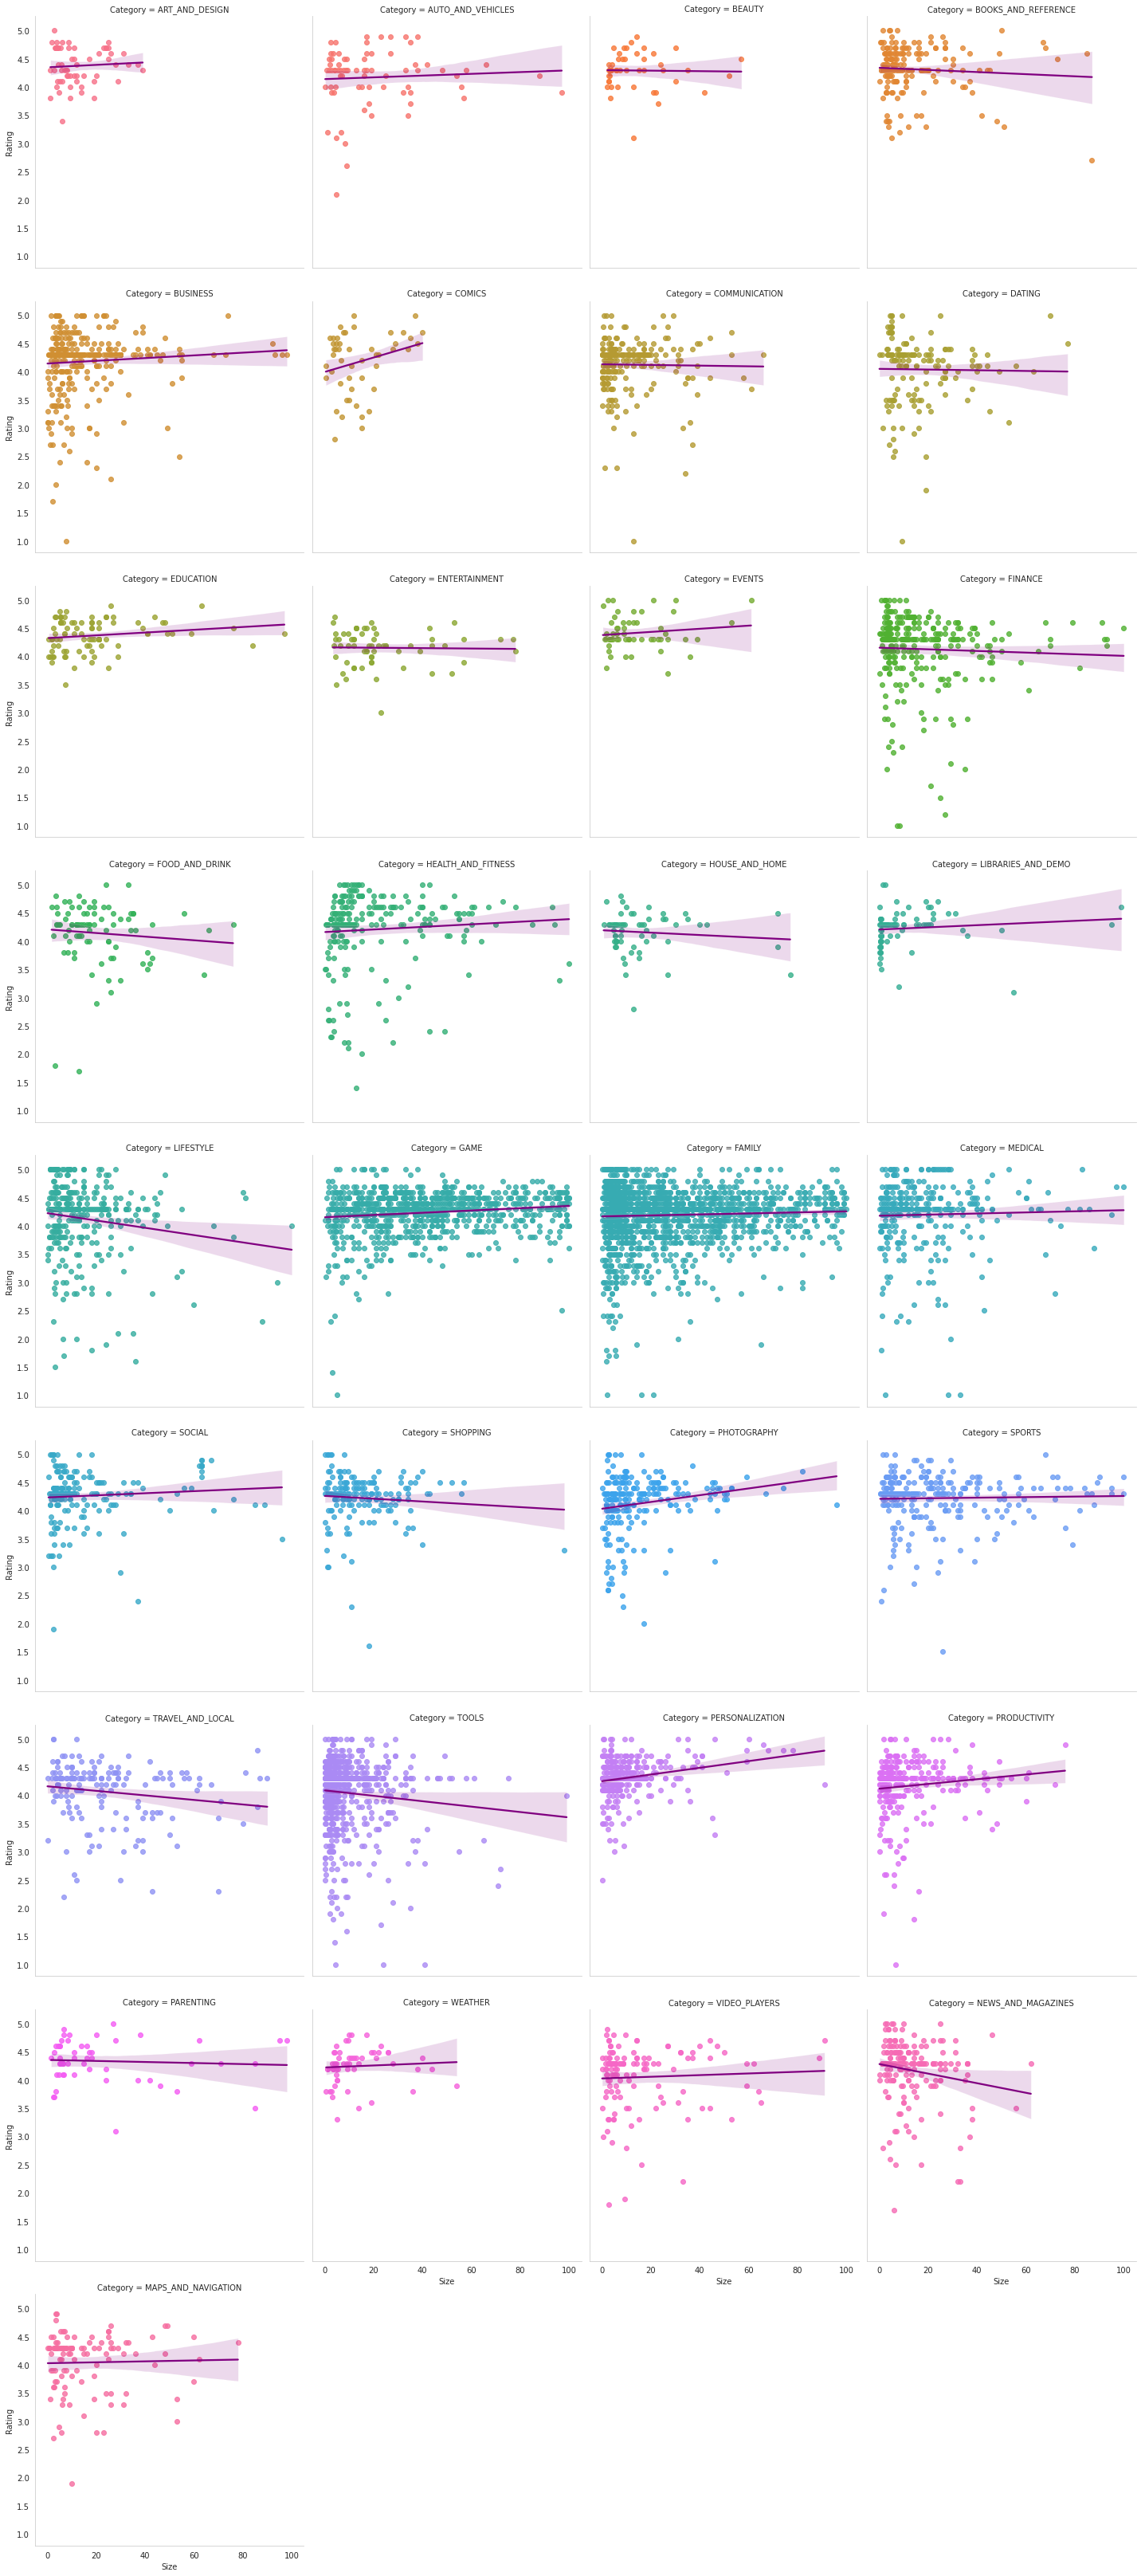

In [75]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y='Rating',x='Size',data=play_store,col="Category", hue="Category",col_wrap=4,line_kws={'color': 'Purple'})

## Let us first define what information the columns contain based on our inspection.

user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

**1. App:** Contains the name of the app with a short description (optional).

**2. Translated_Review:** It contains the English translation of the review dropped by the user of the app.

**3. Sentiment:** It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.

**4. Sentiment_Polarity**: It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.

**5.Sentiment_Subjectivity:** This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.


**Findings** 

The number of null values are:

*  Translated_Review has 26868 null values which contributes 41.79% of the data.

*   Sentiment has 26863 null values which contributes 41.78% of the data.
*  Sentiment_Polarity has 26863 null values which contributes 41.78% of the data.


*  Sentiment_Subjectivity has 26863 null values which contributes 41.78% of the data.



## Let us check if there is any co-relation in both the dataframes.

## Data Visualization on play store data:


We have sucessfully cleaned the dirty data. Now we can perform some data visualization and come up with insights on the given datasets.

### 1). Correlation Heatmap

In [78]:
# Finding correlation between different columns in the play store data
play_store.corr()

,Rating,Reviews,Size
Rating,1.000000,0.050212,0.045528
Reviews,0.050212,1.000000,0.179275
Size,0.045528,0.179275,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

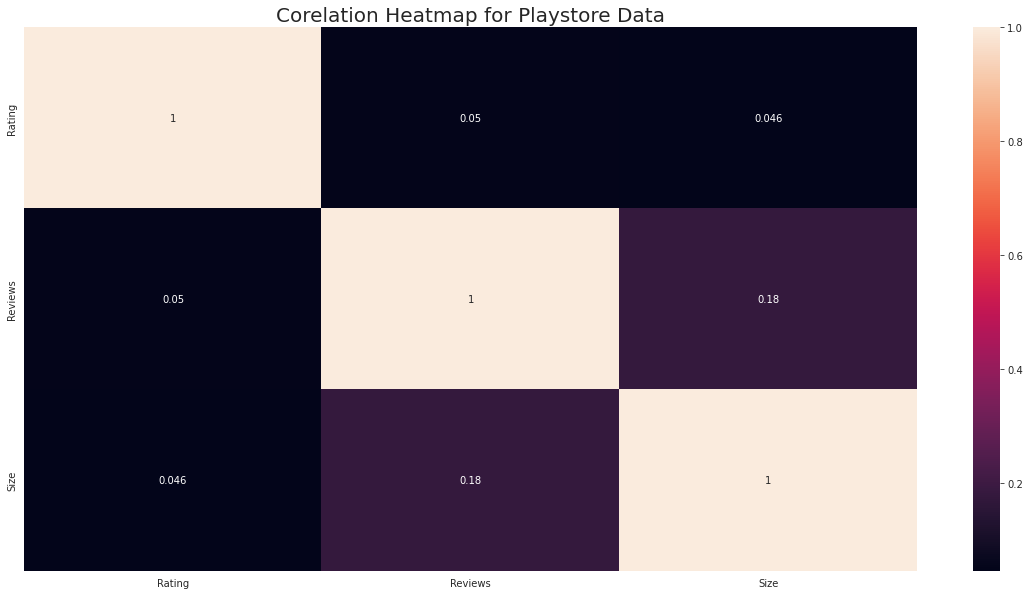

In [80]:
# Heat map for play_store
plt.figure(figsize = (20,10))
sns.heatmap(play_store.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

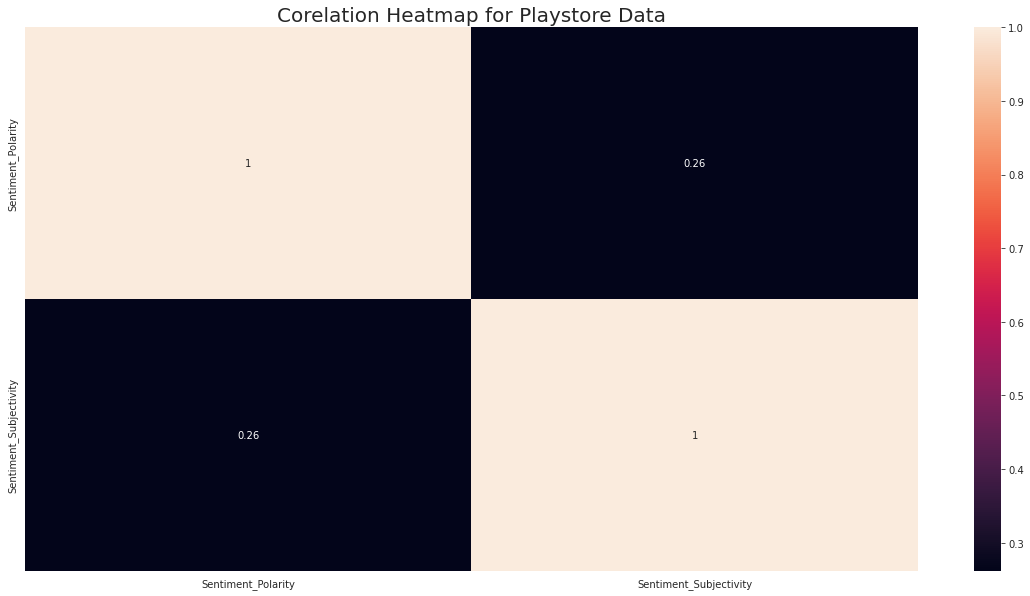

In [81]:
# Heat map for play_store
plt.figure(figsize = (20,10))
sns.heatmap(User_reviews.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

In [84]:
merged_df = pd.merge(play_store, User_reviews, on='App', how = "inner")

In [85]:
def merged_dfinfo():
  temp = pd.DataFrame(index=merged_df.columns)
  temp['data_type'] = merged_df.dtypes
  temp["count of non null values"] = merged_df.count()
  temp['NaN values'] = merged_df.isnull().sum()
  temp['% NaN values'] =merged_df.isnull().mean()
  temp['unique_count'] = merged_df.nunique() 
  return temp
merged_dfinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,61556,0,0.000000,1020
Category,object,61556,0,0.000000,33
Rating,float64,61556,0,0.000000,23
Reviews,int64,61556,0,0.000000,1011
Size,float64,41150,20406,0.331503,176
Installs,object,61556,0,0.000000,13
Type,object,61556,0,0.000000,2
Price,object,61556,0,0.000000,14
Content_Rating,object,61556,0,0.000000,5
Genres,object,61556,0,0.000000,73


In [86]:

merged_df.corr()


,Rating,Reviews,Size,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.093589,0.180241,0.092889,0.068716
Reviews,0.093589,1.000000,0.408929,-0.080007,-0.009265
Size,0.180241,0.408929,1.000000,-0.159357,0.009279
Sentiment_Polarity,0.092889,-0.080007,-0.159357,1.000000,0.259734
Sentiment_Subjectivity,0.068716,-0.009265,0.009279,0.259734,1.000000


Text(0.5, 1.0, ' Heatmap for merged Dataframe')

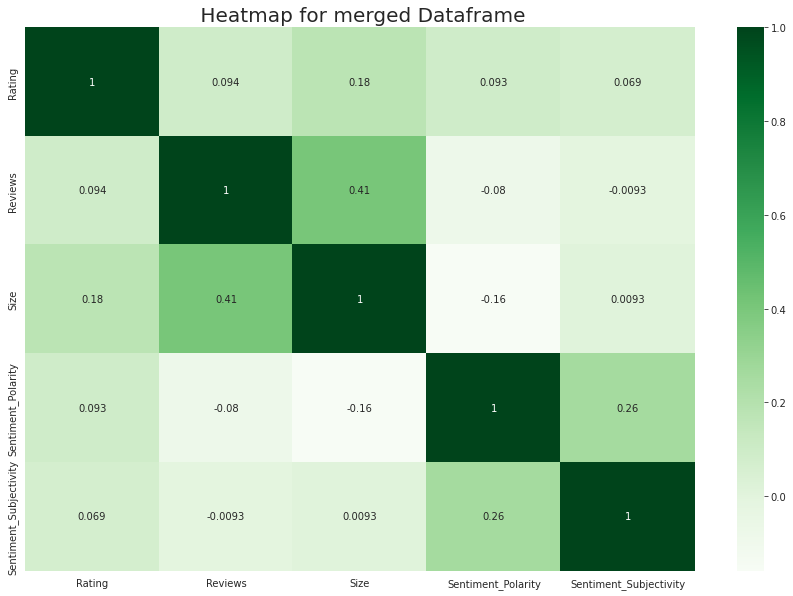

In [87]:
# Correlation heatmap
# Heat Map for the merged data frame
plt.figure(figsize = (15,10))
sns.heatmap(merged_df.corr(), annot= True, cmap='Greens')
plt.title(' Heatmap for merged Dataframe', size=20)

In [88]:
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

In [89]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


Note: After Analysing Above HeatMaps, we can infer that we dont have any sort of good correlations between the different columns of both the data sets.

## 2). What is the ratio of number of Paid apps and Free apps?

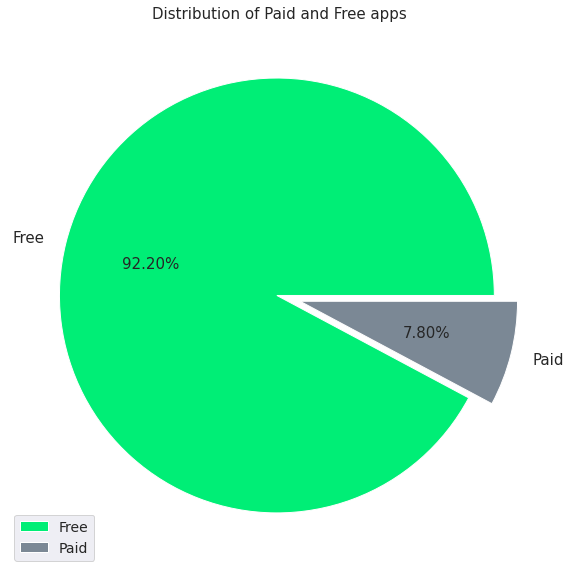

In [93]:
data = play_store['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

Findings:

From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

In [96]:
play_store['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

## 3). Which category of Apps from the Content Rating column are found more on playstore ?

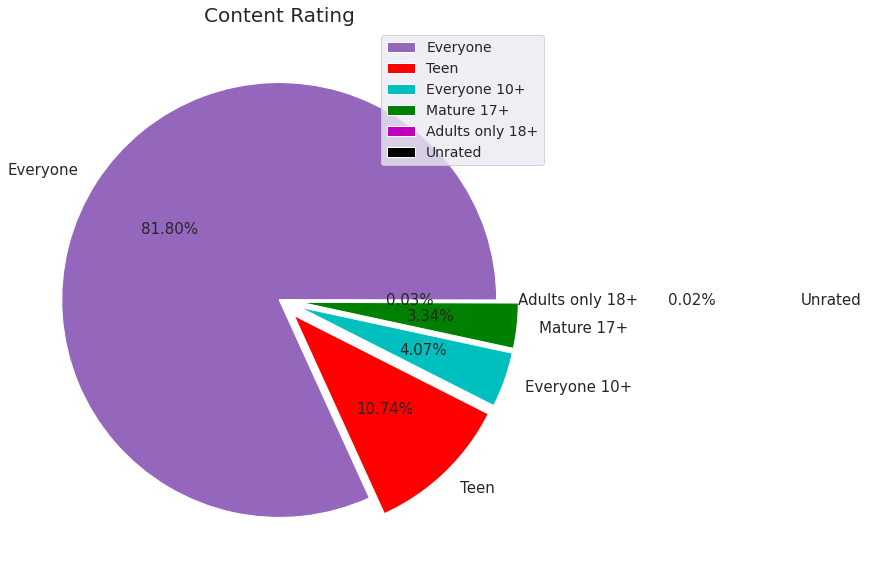

In [99]:
# Content rating of the apps
data = play_store['Content_Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

A majority of the apps (82%) in the play store are can be used by everyone.The remaining apps have various age restrictions to use it.

##  4) Top categories on Google Playstore?

In [100]:
play_store.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [101]:
x = play_store['Category'].value_counts()
y = play_store['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

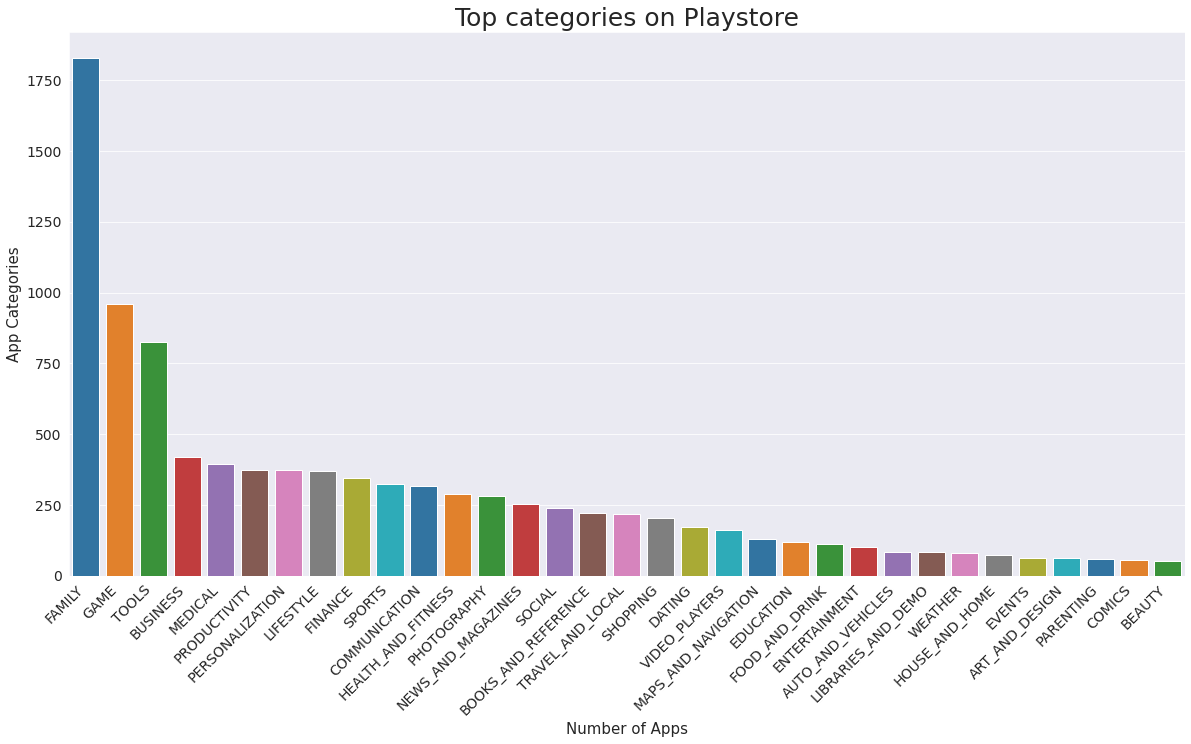

In [104]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

## Findings:

So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are underFAMILY & GAME category and least are of EVENTS & BEAUTY Category.

Which category of Apps from the ‘Content Rating’ column is found more on the play store?

In [105]:
x2 = play_store['Content_Rating'].value_counts().index
y2 = play_store['Content_Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

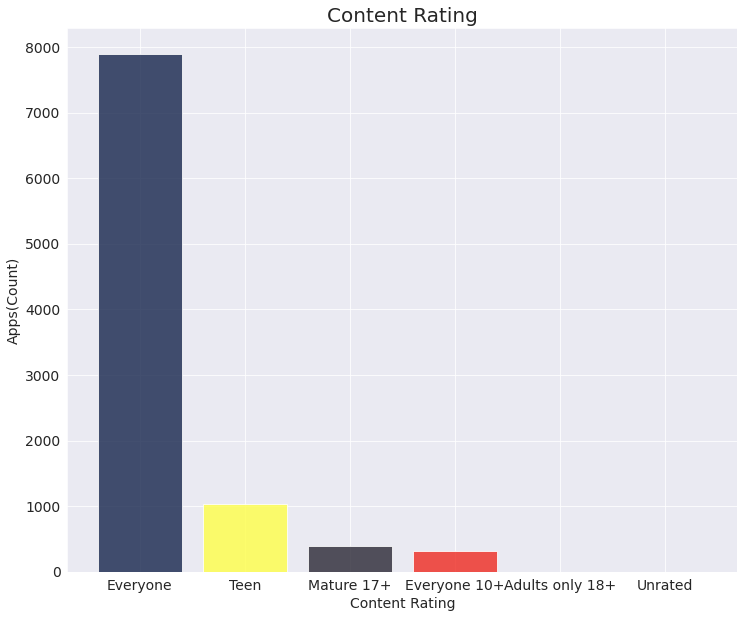

In [106]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

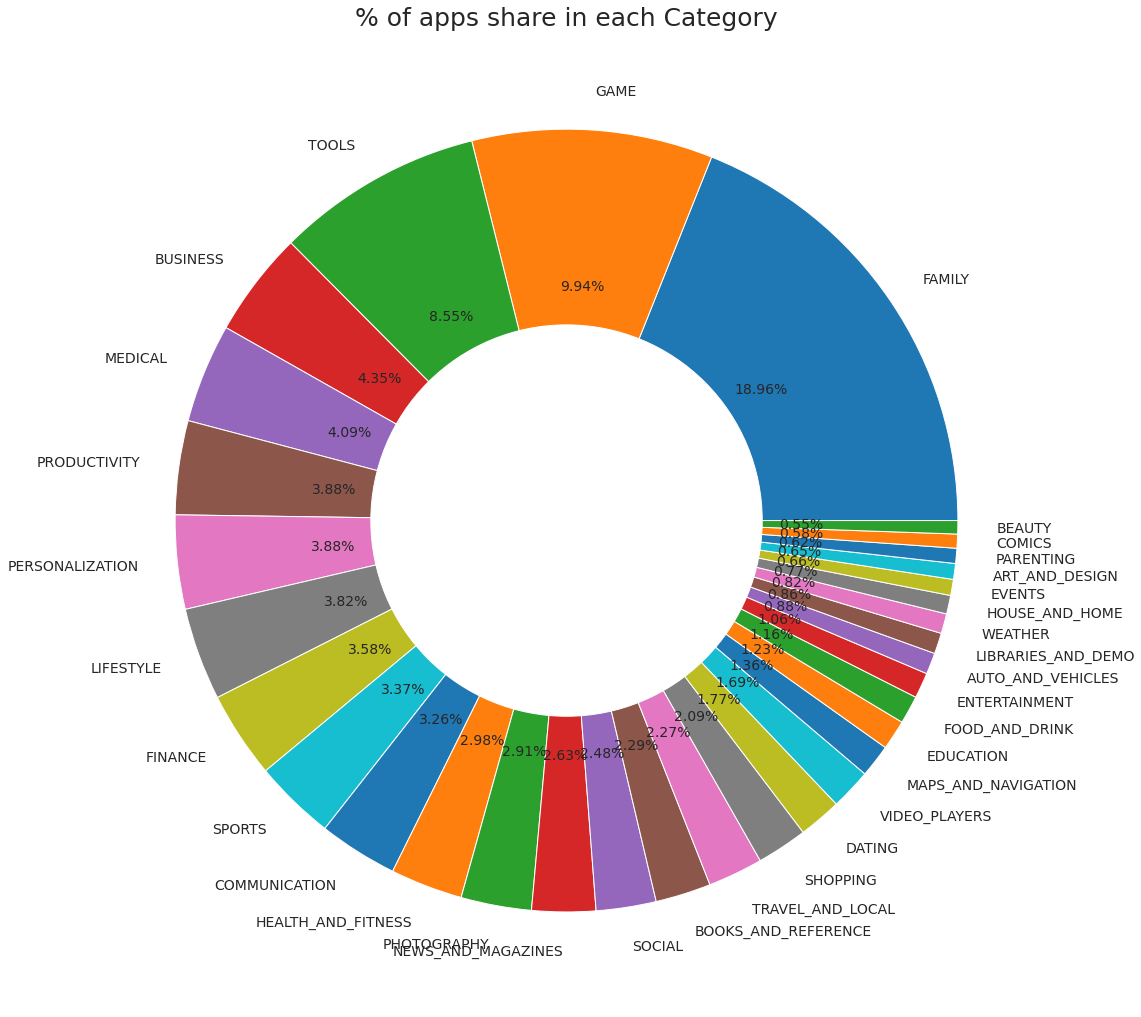

In [109]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(18,18))
plt.pie(play_store.Category.value_counts(), labels=play_store.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

## 5).2.Distribution of the ratings of the apps?

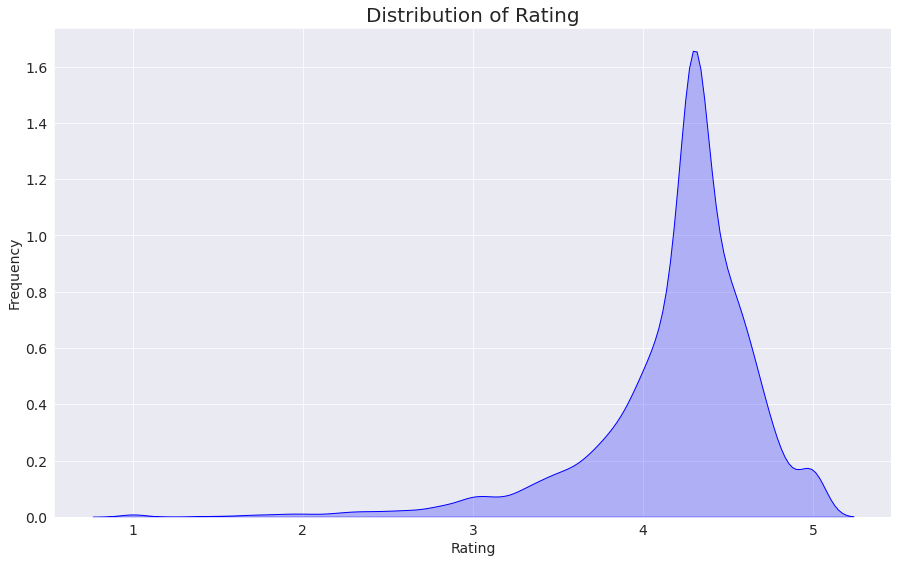

In [113]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(play_store.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

# 6.Let us get some insight about the ratings for each category.

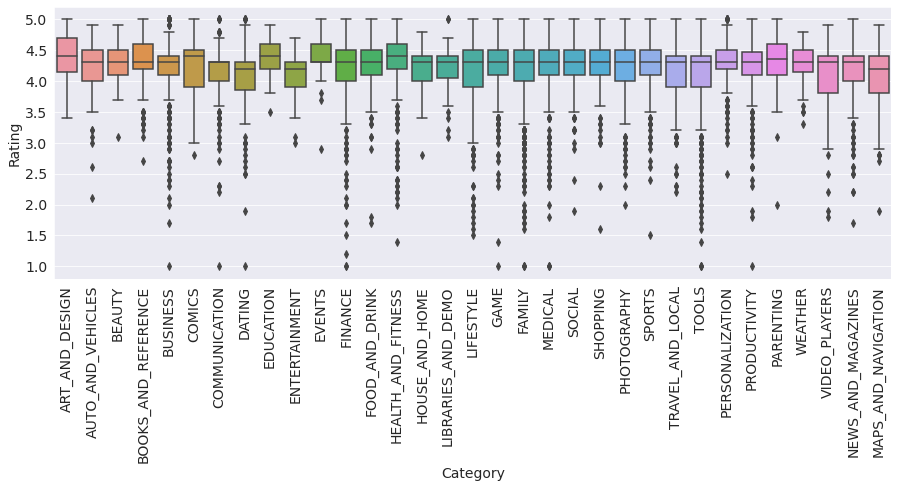

In [114]:
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Category',y='Rating',data=play_store)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

#7.Histogram of Subjectivity

From the below plot, we cannot say that there is a relation, it seems that irrespective of the Reviews, the ratings are majorly between 4 and 5, which we also noticed before.

Also it is not correct to assume that rating and reviews have a relationship because reviews can be positive or negative and increase in the number of reviews does not show whether. the Reviews are Positive or Negative.

In [115]:
merged_PS_UR.Sentiment_Subjectivity.value_counts()

0.000000    6770
0.500000    2891
1.000000    2668
0.750000    1946
0.600000    1887
            ... 
0.393277       1
0.310459       1
0.468849       1
0.547778       1
0.545714       1
Name: Sentiment_Subjectivity, Length: 4382, dtype: int64

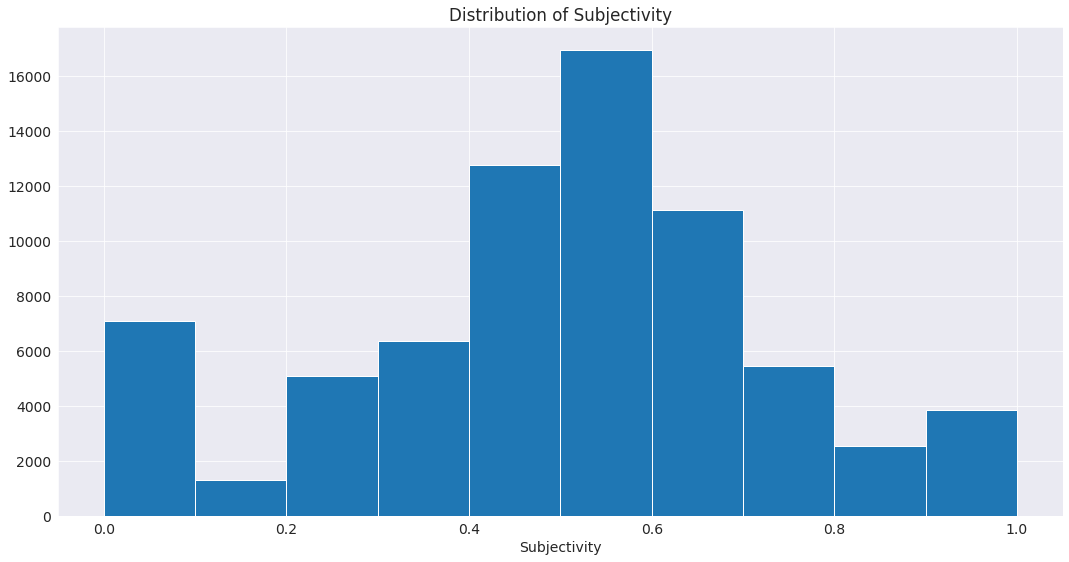

In [116]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_PS_UR[merged_PS_UR['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

## 8.Is sentiment_subjectivity proportional to sentiment_polarity?

<ipython-input-117-510e85c96551>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



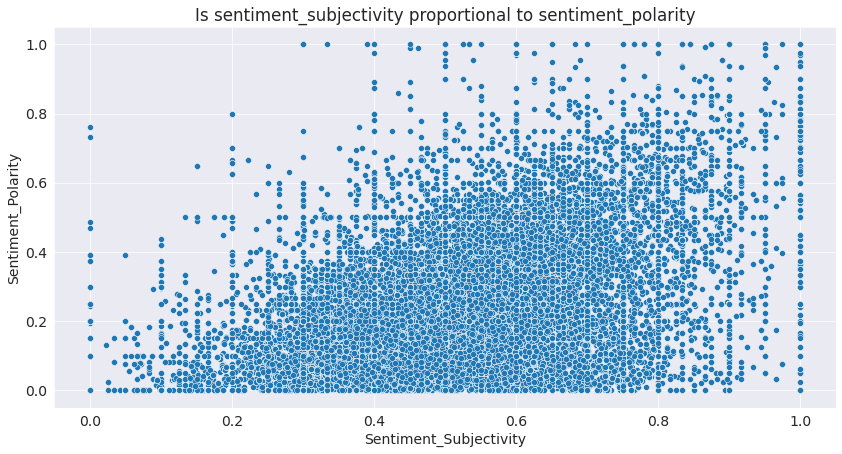

In [117]:
sentimet_subjectivity_polarity = merged_PS_UR.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})
merged_PS_UR['Sentiment_Subjectivity'] = merged_PS_UR['Sentiment_Subjectivity'].abs()
merged_PS_UR['Sentiment_Polarity'] = merged_PS_UR['Sentiment_Polarity'].abs()
plt.figure(figsize=(14,7))
sns.scatterplot(merged_PS_UR['Sentiment_Subjectivity'], merged_PS_UR['Sentiment_Polarity'])
plt.title("Is sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

## 9.Percentage of Review Sentiments

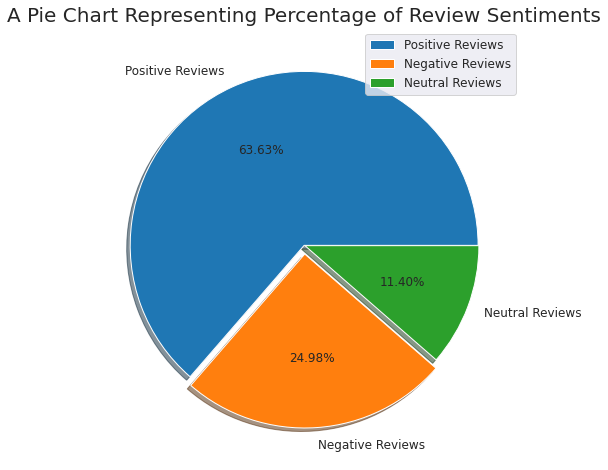

In [118]:
counts = list(merged_PS_UR['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

Findings:

Positive reviews are 64.30%
Negative reviews are 25.9%
Neutral reviews are 12.90%

##  Average rating of the apps

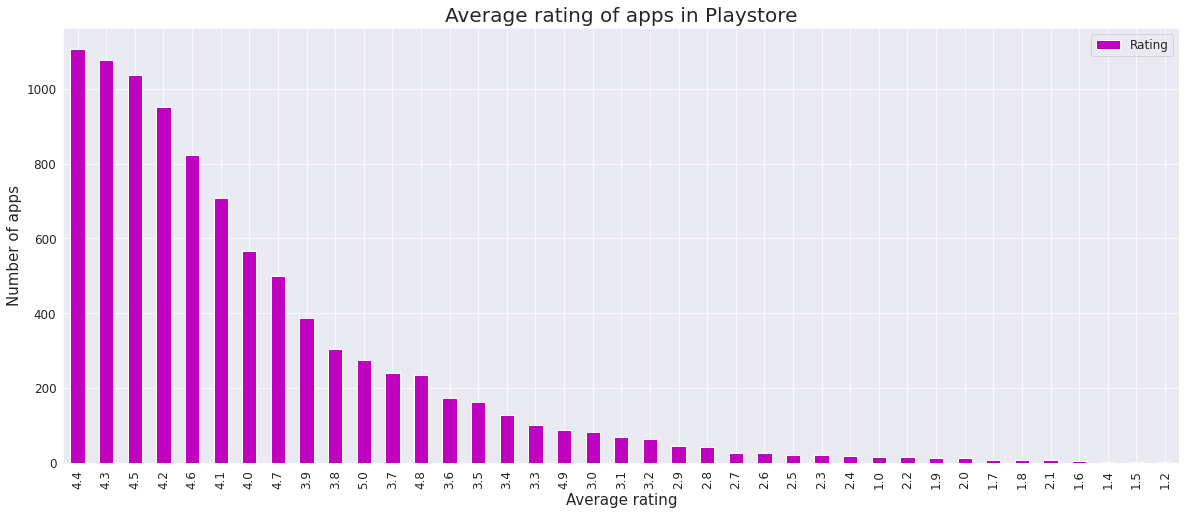

In [ ]:
# Average app ratings

ps_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

We can represent the ratings in a better way if we group the ratings between certain intervals. Here, we can group the rating as follows:


4-5: Top rated

3-4: Above average

2-3: Average

1-2: Below average


### Lets create a new column Rating group in the main dataframe and apply these filters.

In [ ]:
# Defining a function grouped_rating to group the ratings as mentioned above
def Rating_app(val):
  ''''
  This function help to categories the rating from 1 to 5
  as Top_rated,Above_average,Average & below Average
  '''
  if val>=4:
    return 'Top rated'
  elif val>3 and val<4:
    return 'Above Average'
  elif val>2 and val<3:
    return 'Average'
  else:
    return 'Below Average'

### Lets apply the grouped_rating function on the Rating column and save the output in new column named as Rating group in the main df.

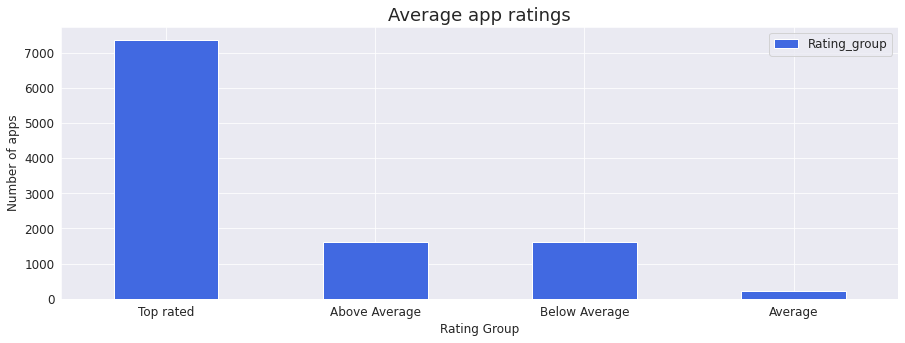

In [ ]:
# Applying grouped_rating function
ps_df['Rating_group']=ps_df['Rating'].apply(lambda x: Rating_app(x))
# Average app ratings 
ps_df['Rating_group'].value_counts().plot.bar(figsize=(15,5), color = 'royalblue')
plt.xlabel('Rating Group', fontsize = 12)
plt.ylabel('Number of apps', fontsize = 12)
plt.title('Average app ratings', fontsize = 18)
plt.xticks(rotation=0)
plt.legend()

## Apps with the highest number of positive reviews

In [122]:
# positive reviews
positive_User_reviews=User_reviews[User_reviews['Sentiment']=='Positive']
positive_User_reviews


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


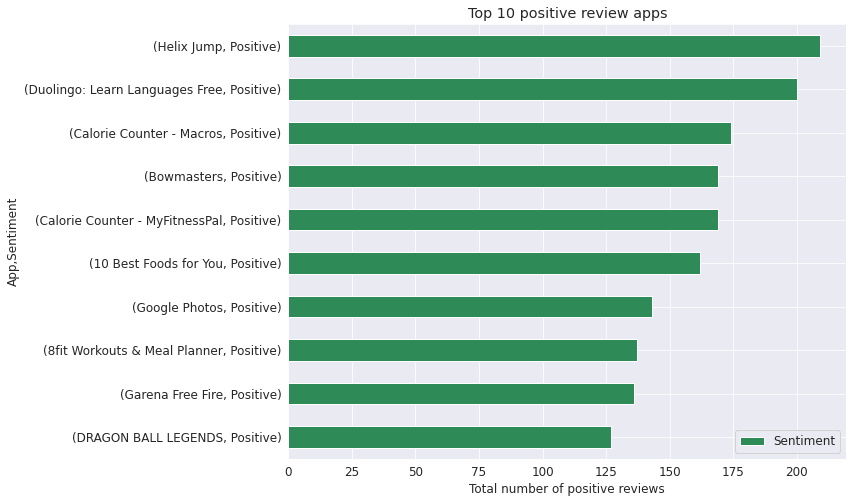

In [123]:
positive_User_reviews.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

## Apps with the highest number of negative reviews.

In [125]:
negative__User_reviews=User_reviews[User_reviews['Sentiment']=='Negative']
negative__User_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


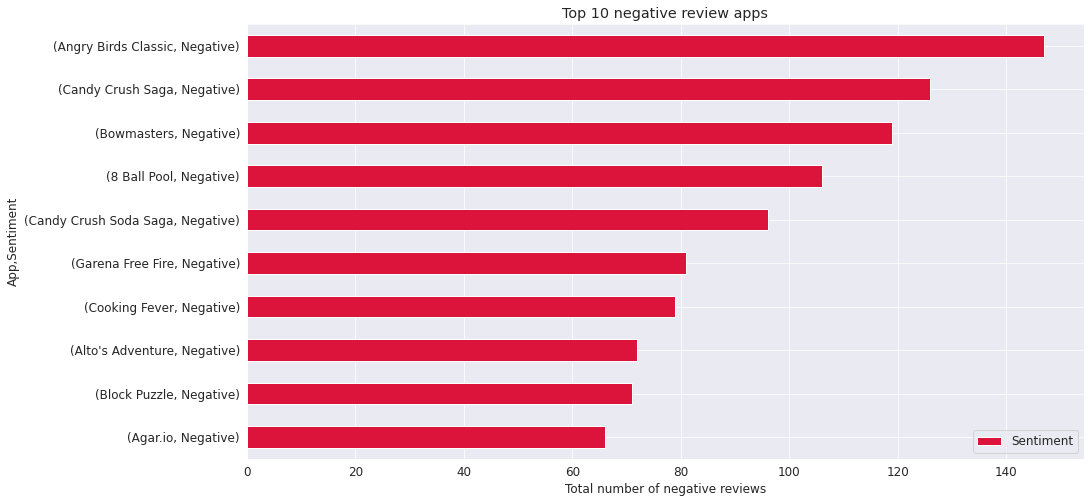

In [126]:
negative__User_reviews.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='crimson').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

## Is sentiment_subjectivity proportional to sentiment_polarity?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



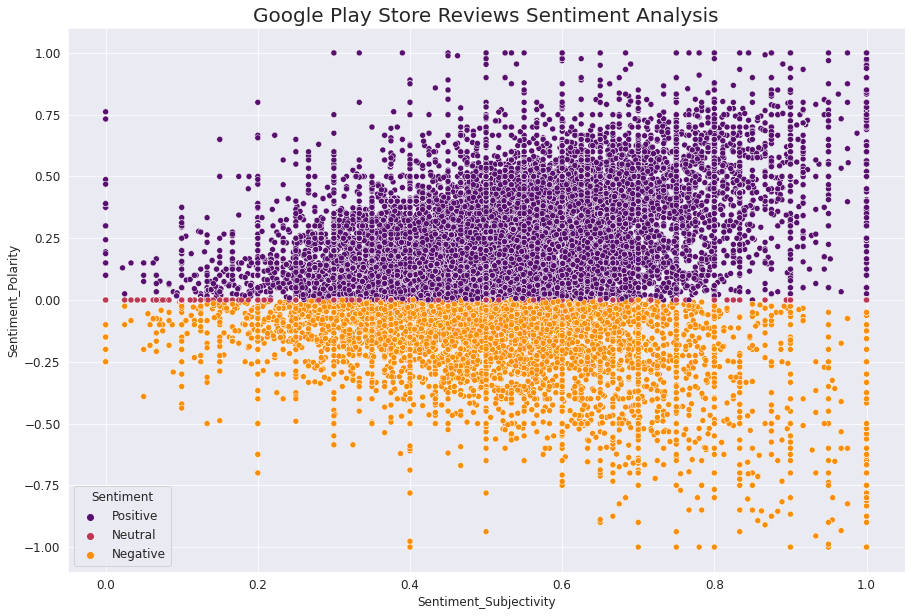

In [127]:
# scatterplot of sentiment polarity and sentiment subjectivity
plt.figure(figsize=(15, 10))
sns.scatterplot(User_reviews['Sentiment_Subjectivity'], User_reviews['Sentiment_Polarity'],
                hue = User_reviews['Sentiment'], edgecolor='white', palette="inferno")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

## Challenges & Future Work
Our major challenge was data cleaning.

13.60% of reviews were NaN values, and even after merging both the dataframes, we could not infer much in order to fill them. Thus we had to drop them.

The merged data frame of both play store and user reviews, had only 816 common apps. This is just 10% of the cleaned data, we could have given more valuable analysis, if we had atleast 70% - 80% of the data available in the merged dataframes.

User Reviews had 42% of NaN values, which could have been used for developing an understanding of the category wise sentiments, which would help us to fill 13.60% NaN values of the Reviews column.

There is so much more which can be explored. Like we have current version, android version available which can be explored in detail and we can come out with more analysis where we can tell how does these things effect and needs to be kept in mind while developing app for the users.

We can explore the correlation between the size of the app and the version of Android on the number of installs.

Machine learning can help us to deploy more insights by developing models which can help us interpret even more better. We have left this as future work as this is something where we can work on.

## **Conclusion**

The Google Play Store Apps report provides some useful insights regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.
   Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL, COMMUNICATION and GAME like Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans etc.